In [9]:
from model import Unet
import torch 
import numpy as np
import cv2
import matplotlib.pyplot as plt
import json
import random
import torch.nn.functional as F

In [10]:
model = Unet()
ckpt = "ckpt_latest.pth"
states = torch.load(ckpt)
model.load_state_dict(states)

<All keys matched successfully>

In [24]:
img = cv2.imread(img_path).astype(np.float32) /255.0


In [25]:
tensored = torch.from_numpy(img)[None, :, : ,:]

In [26]:
model.eval()
with torch.inference_mode():
    segmented = F.sigmoid(model(tensored)).squeeze().numpy()

In [27]:
segmented

array([[0.21830615, 0.14851817, 0.12880082, ..., 0.12347324, 0.08537875,
        0.0957515 ],
       [0.22937578, 0.14050217, 0.13271537, ..., 0.09386231, 0.05599449,
        0.06181682],
       [0.33637908, 0.33427146, 0.30536926, ..., 0.16102579, 0.10437644,
        0.10050133],
       ...,
       [0.09174588, 0.06088211, 0.03458287, ..., 0.01848619, 0.01699559,
        0.03631683],
       [0.10014993, 0.07006499, 0.04150571, ..., 0.0211496 , 0.02086043,
        0.04526664],
       [0.12705564, 0.08613048, 0.07315324, ..., 0.04768564, 0.04944505,
        0.08201423]], dtype=float32)

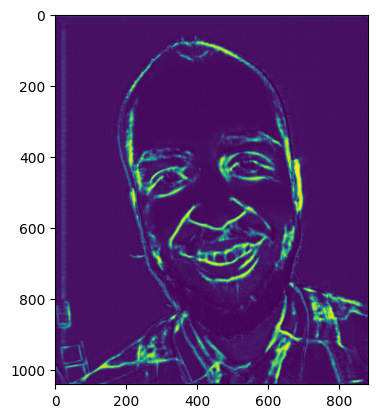

In [28]:
fig, ax = plt.subplots()

ax.imshow(segmented)

In [30]:
cv2.imwrite('bugfanji_segmented.png', segmented*255)

True